<a href="https://colab.research.google.com/github/bcramp/AI/blob/main/HW2/Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 2 Problem 4 Introduction:**
HW 2: Problem 4

Title: Leet Code: Number of Islands with BFS

Name: Brennen Cramp

Date: 9/23/2025


---


**The problem:**

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [9]:
#@title Solution Class with NumIslands Function

# Import the Deque class from the Collections library
from collections import deque

class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """

        # First, check if the grid is empty
        if not grid:
            print('The grid is empty. Returning 0.')
            return 0

        # Initialize the number of islands to 0
        numOfIslands = 0

        # Initialize the dimensions of the grid
        m = len(grid)
        n = len(grid[0])

        # Iterate through the rows in the grid
        for y in range(m):
            # Iterate through the columns for the current row
            for x in range(n):
                # Check if there is land at the current spot
                if grid[y][x] == "1":
                    # Increase the island count
                    numOfIslands += 1

                    # ---------- Start BFS to search where the island ends ----------
                    # Create a visited set and add the current land spot (root node) first
                    visited = set()
                    visited.add((y, x))

                    # Create an active queue (using deque) to track the active nodes and add the current land spot (root node)
                    active = deque([(y, x)])

                    # Update the current coords of land (1) to water (0) to not confuse BFS deciding what is land and water
                    grid[y][x] = "0"

                    # Make a list of possible movements from the current spot
                    # 1: DOWN, 2: RIGHT, 3: UP, 4: LEFT
                    moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]

                    # While the active queue is not empty, iterate through the nodes with BFS
                    while active:
                        # Dequeue the coordinates from the active queue
                        # Current Y is the row and Current X is the column
                        currY, currX = active.popleft()

                        # Iterate through the current spot's neighbors
                        for moveY, moveX in moves:
                            # Add/subtract from the current spot to move to the neighbor spot
                            neighborY = currY + moveY
                            neighborX = currX + moveX

                            # Check if the neighbor has valid coordinates
                            if (neighborY >= 0 and neighborY <= (m - 1)) and (neighborX >= 0 and neighborX <= (n - 1)):
                                # If the neighbor has not been visited and is land, add them to the visited set
                                if (neighborY, neighborX) not in visited and grid[neighborY][neighborX] == "1":
                                    visited.add((neighborY, neighborX))
                                    # Enqueue the neighbor
                                    active.append((neighborY, neighborX))

                                    # Update the neighbor coords of land (1) to water (0) to not confuse BFS deciding what is land and water
                                    grid[neighborY][neighborX] = "0"

        # Print how many islands were found
        print("-----------------------")
        print("There were {n} island(s) found in the grid!".format(n=numOfIslands))
        print("-----------------------")

        return numOfIslands


# **Current Task**

Given an m by n 2D binary grid which represents a map of '1's (land) and '0's (water), return the number of islands.

In [10]:
#@title Executing the Solution

# Initialize Solution class
sol = Solution()

# Initialize the first land/water grid
grid1 = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

# Initialize the second land/water grid
grid2 = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

# -------------------- Scan through the first grid --------------------
# Pass in first grid (grid1) to find the number of islands present (1)
# Note: The printing of how many islands that were found is at the end of the function!
print('Scanning for islands in the first grid!')
num = sol.numIslands(grid1)
print()


# -------------------- Scan through the second grid --------------------
# Pass in second grid (grid2) to find the number of islands present (3)
# Note: The printing of how many islands that were found is at the end of the function!
print('Scanning for islands in the second grid!')
num = sol.numIslands(grid2)

Scanning for islands in the first grid!
-----------------------
There were 1 island(s) found in the grid!
-----------------------

Scanning for islands in the second grid!
-----------------------
There were 3 island(s) found in the grid!
-----------------------


# **Results**

Leet code accepted submission:

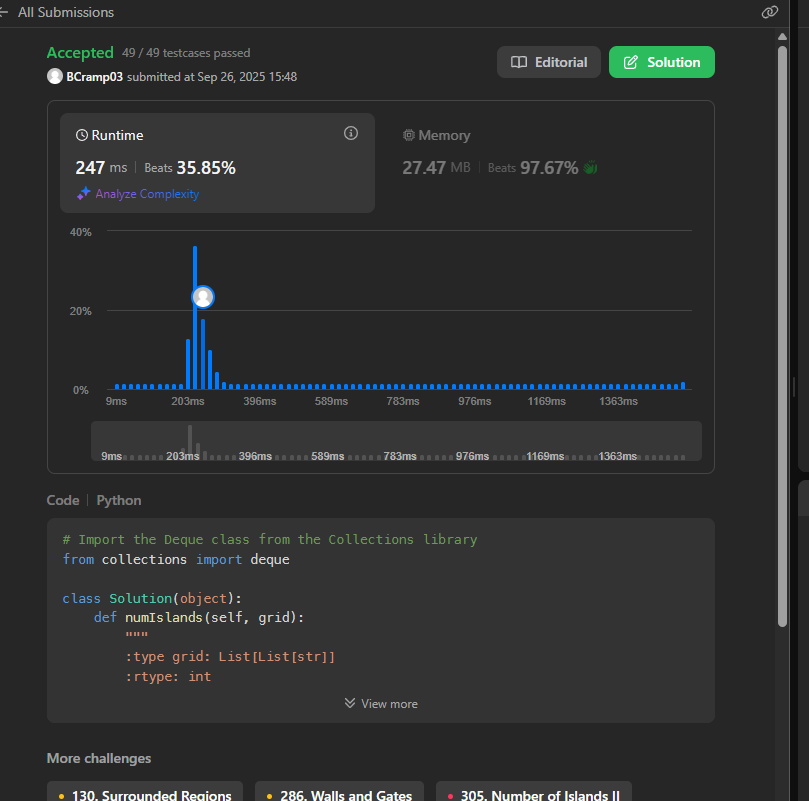

**Discussion:**

I used BFS by first iterating through the grid's coordinates and checking where there was land (skipping over sections that were water) then expanding off of the found land coordinates to survey the entire island. This was done by visiting all the adjacent land neighbors (down, right, up, and left; where spot = "1") and once added to my visited set, I also updated the neighbor's land to water as to not confuse BFS which, when I was testing, would add all the instances of land in the grid due to re-counting the neighbors since they were still "1". BFS would expand across all the land neighbors and once it found water surrounding the final land spot, it will end the current BFS cycle for the found island and scan back through the grid for the next indication of land; thus restarting the process.
